In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
reviews=pd.read_csv('H:\Data Science Assignments\Data Science Assignments\Text Minning\extract_reviews.csv')

In [3]:
reviews

stars                                            comment
0     1.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    This product is du...
1     1.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    You should be a bi...
2     1.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    This product is du...
3     1.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    This product is du...
4     1.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    This product is du...
...                  ...                                                ...
1175  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    My honest review a...
1176  3.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Same as I phone 12...
1177  3.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Apple Marketing ha...
1178  2.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    The look is retrog...
1179  1.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Price is very low ...

[1180 rows x 2 columns]

In [4]:
reviews=[comment.strip() for comment in reviews.comment]
reviews=[comment for comment in reviews if comment]
reviews[0:10]

['This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone',
 'You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂',
 'This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone',
 'This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone',
 'This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone',
 'This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone',
 'Just but iphone 12!It’s not worth the money!Unless ur from BJP or something where you’re full with corrupt money, then go ahead.',
 'i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this re

In [5]:
reviews_text=' '.join(reviews)
reviews_text

"This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂 This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone Just but iphone 12!It’s not worth the money!Unless ur from BJP or something where you’re full with corrupt money, then go ahead. i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i 

In [6]:
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'This product is duplicate of iPhone 12 only camera design changed Very low quality of this product Buy Samsung mobile phone You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂 This product is duplicate of iPhone 12 only camera design changed Very low quality of this product Buy Samsung mobile phone This product is duplicate of iPhone 12 only camera design changed Very low quality of this product Buy Samsung mobile phone This product is duplicate of iPhone 12 only camera design changed Very low quality of this product Buy Samsung mobile phone This product is duplicate of iPhone 12 only camera design changed Very low quality of this product Buy Samsung mobile phone Just but iphone 12It’s not worth the moneyUnless ur from BJP or something where you’re full with corrupt money then go ahead i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my c

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['This', 'product', 'is', 'duplicate', 'of', 'iPhone', '12', 'only', 'camera', 'design', 'changed', 'Very', 'low', 'quality', 'of', 'this', 'product', 'Buy', 'Samsung', 'mobile', 'phone', 'You', 'should', 'be', 'a', 'bigggggg', 'bot', 'to', 'buy', 'this', 'phoneYou', 'could', 'get', 'iPhone', '12', 'Pro', 'that', '’', 's', 'the', 'best', '😂', 'This', 'product', 'is', 'duplicate', 'of', 'iPhone', '12', 'only']


In [9]:
len(text_tokens)

109740

In [10]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A','This']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['product', 'duplicate', 'iPhone', '12', 'camera', 'design', 'changed', 'Very', 'low', 'quality', 'product', 'Buy', 'Samsung', 'mobile', 'phone', 'You', 'bigggggg', 'bot', 'buy', 'phoneYou', 'could', 'get', 'iPhone', '12', 'Pro', '’', 'best', '😂', 'product', 'duplicate', 'iPhone', '12', 'camera', 'design', 'changed', 'Very', 'low', 'quality', 'product', 'Buy', 'Samsung', 'mobile', 'phone', 'product', 'duplicate', 'iPhone', '12', 'camera', 'design', 'changed', 'Very', 'low', 'quality', 'product', 'Buy', 'Samsung', 'mobile', 'phone', 'product', 'duplicate', 'iPhone', '12', 'camera', 'design', 'changed', 'Very', 'low', 'quality', 'product', 'Buy', 'Samsung', 'mobile', 'phone', 'product', 'duplicate', 'iPhone', '12', 'camera', 'design', 'changed', 'Very', 'low', 'quality', 'product', 'Buy', 'Samsung', 'mobile', 'phone', 'Just', 'iphone', '12It', '’', 'worth', 'moneyUnless', 'ur', 'BJP', 'something', '’', 'full', 'corrupt', 'money', 'go', 'ahead', 'poor', 'cant', 'afford', 'lmao', 'xdxdxdxd

In [11]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['product', 'duplicate', 'iphone', '12', 'camera', 'design', 'changed', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'you', 'bigggggg', 'bot', 'buy', 'phoneyou', 'could', 'get', 'iphone', '12', 'pro', '’', 'best', '😂', 'product', 'duplicate', 'iphone', '12', 'camera', 'design', 'changed', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'product', 'duplicate', 'iphone', '12', 'camera', 'design', 'changed', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'product', 'duplicate', 'iphone', '12', 'camera', 'design', 'changed', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'product', 'duplicate', 'iphone', '12', 'camera', 'design', 'changed', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'just', 'iphone', '12it', '’', 'worth', 'moneyunless', 'ur', 'bjp', 'something', '’', 'full', 'corrupt', 'money', 'go', 'ahead', 'poor', 'cant', 'afford', 'lmao', 'xdxdxdxd

In [12]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['product', 'duplic', 'iphon', '12', 'camera', 'design', 'chang', 'veri', 'low', 'qualiti', 'product', 'buy', 'samsung', 'mobil', 'phone', 'you', 'bigggggg', 'bot', 'buy', 'phoney', 'could', 'get', 'iphon', '12', 'pro', '’', 'best', '😂', 'product', 'duplic', 'iphon', '12', 'camera', 'design', 'chang', 'veri', 'low', 'qualiti', 'product', 'buy', 'samsung', 'mobil', 'phone', 'product', 'duplic', 'iphon', '12', 'camera', 'design', 'chang', 'veri', 'low', 'qualiti', 'product', 'buy', 'samsung', 'mobil', 'phone', 'product', 'duplic', 'iphon', '12', 'camera', 'design', 'chang', 'veri', 'low', 'qualiti', 'product', 'buy', 'samsung', 'mobil', 'phone', 'product', 'duplic', 'iphon', '12', 'camera', 'design', 'chang', 'veri', 'low', 'qualiti', 'product', 'buy', 'samsung', 'mobil', 'phone', 'just', 'iphon', '12it', '’', 'worth', 'moneyunless', 'ur', 'bjp', 'someth', '’', 'full', 'corrupt', 'money', 'go', 'ahead', 'poor', 'cant', 'afford', 'lmao', 'xdxdxdxdxd', 'money', 'flex', 'buy', 'bore', 'that

In [13]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

product duplicate iphone 12 camera design changed very low quality product buy samsung mobile phone you bigggggg bot buy phoneyou could get iphone 12 pro ’ best 😂 product duplicate iphone 12 camera design changed very low quality product buy samsung mobile phone product duplicate iphone 12 camera design changed very low quality product buy samsung mobile phone product duplicate iphone 12 camera design changed very low quality product buy samsung mobile phone product duplicate iphone 12 camera design changed very low quality product buy samsung mobile phone just iphone 12it ’ worth moneyunless ur bjp something ’ full corrupt money go ahead poor cant afford lmao xdxdxdxdxd money flex buy bored thats writing review drinking coffee chemistry exam manday cant study mole concept got bored thats came write review read review til good justt wasted time go something productive money get phone dream get phone definitely fulfilled one day my honest review going broke buying depreciating objecti u

In [14]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['product', 'duplicate', 'iphone', '12', 'camera', 'design', 'change', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'you', 'bigggggg', 'bot', 'buy', 'phoneyou', 'could', 'get', 'iphone', '12', 'pro', "'", 'good', '😂', 'product', 'duplicate', 'iphone', '12', 'camera', 'design', 'change', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'product', 'duplicate', 'iphone', '12', 'camera', 'design', 'change', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'product', 'duplicate', 'iphone', '12', 'camera', 'design', 'change', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'product', 'duplicate', 'iphone', '12', 'camera', 'design', 'change', 'very', 'low', 'quality', 'product', 'buy', 'samsung', 'mobile', 'phone', 'just', 'iphone', '12it', "'", 'worth', 'moneyunless', 'ur', 'bjp', 'something', "'", 'full', 'corrupt', 'money', 'go', 'ahead', 'poor', 'can', 'not', 'afford', 'lmao', 'xdxdxdx

In [15]:
clean_reviews=' '.join(lemmas)
clean_reviews

"product duplicate iphone 12 camera design change very low quality product buy samsung mobile phone you bigggggg bot buy phoneyou could get iphone 12 pro ' good 😂 product duplicate iphone 12 camera design change very low quality product buy samsung mobile phone product duplicate iphone 12 camera design change very low quality product buy samsung mobile phone product duplicate iphone 12 camera design change very low quality product buy samsung mobile phone product duplicate iphone 12 camera design change very low quality product buy samsung mobile phone just iphone 12it ' worth moneyunless ur bjp something ' full corrupt money go ahead poor can not afford lmao xdxdxdxdxd money flex buy bore that s writing review drink coffee chemistry exam manday can not study mole concept get bore that s come write review read review til good justt waste time go something productive money get phone dream get phone definitely fulfil one day my honest review go broke buy depreciate objecti use android ph

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [17]:
print(cv.vocabulary_)

{'product': 238, 'duplicate': 101, 'iphone': 162, '12': 2, 'camera': 60, 'design': 91, 'change': 64, 'very': 311, 'low': 190, 'quality': 243, 'buy': 59, 'samsung': 257, 'mobile': 199, 'phone': 227, 'you': 329, 'bigggggg': 47, 'bot': 52, 'phoneyou': 228, 'could': 81, 'get': 134, 'pro': 237, 'good': 139, 'just': 170, '12it': 5, 'worth': 322, 'moneyunless': 203, 'ur': 307, 'bjp': 48, 'something': 273, 'full': 131, 'corrupt': 80, 'money': 202, 'go': 138, 'ahead': 24, 'poor': 232, 'can': 61, 'not': 212, 'afford': 23, 'lmao': 185, 'xdxdxdxdxd': 326, 'flex': 126, 'bore': 51, 'that': 288, 'writing': 325, 'review': 252, 'drink': 100, 'coffee': 73, 'chemistry': 69, 'exam': 111, 'manday': 194, 'study': 281, 'mole': 201, 'concept': 76, 'come': 75, 'write': 324, 'read': 246, 'til': 293, 'justt': 171, 'waste': 314, 'time': 295, 'productive': 239, 'dream': 99, 'definitely': 89, 'fulfil': 130, 'one': 217, 'day': 87, 'my': 207, 'honest': 155, 'broke': 56, 'depreciate': 90, 'objecti': 215, 'use': 309, '

In [18]:
print(cv.get_feature_names()[150:300])

['hd', 'help', 'helpful', 'high', 'hold', 'honest', 'hyped', 'image', 'in', 'inception', 'integration', 'io', 'iphone', 'iphoneimpression', 'iqoo', 'issue', 'itiphone', 'ittruly', 'jio', 'job', 'just', 'justt', 'keep', 'kind', 'lack', 'last', 'launch', 'left', 'legend', 'lens', 'less', 'level', 'life', 'light', 'like', 'lmao', 'lock', 'look', 'loose', 'lot', 'low', 'magsafei', 'main', 'make', 'manday', 'marketing', 'max', 'may', 'mixed', 'mobile', 'mode', 'mole', 'money', 'moneyunless', 'month', 'motor', 'much', 'my', 'never', 'new', 'no', 'normal', 'not', 'nothing', 'notification', 'objecti', 'offer', 'one', 'open', 'openness', 'optimise', 'over', 'pain1', 'pause', 'pay', 'people', 'perfect', 'phone', 'phoneyou', 'physical', 'pic', 'play', 'poor', 'power', 'prepay', 'previous', 'price', 'pro', 'product', 'productive', 'promote', 'provide', 'purchase', 'quality', 'quite', 'reach', 'read', 'really', 'receive', 'recommend', 'relate', 'retrograde', 'review', 'revise', 'righti', 'roast', '

In [19]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
print(reviewscv.toarray().shape)

(63838, 330)


In [21]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [22]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['12', '13', 'also', 'and', 'android', 'angle', 'annoying', 'apple', 'battery', 'be', 'because', 'believe', 'bore', 'box', 'bug', 'buy', 'camera', 'can', 'charge', 'charger', 'cheap', 'decide', 'display', 'do', 'esim', 'etc', 'even', 'extra', 'fast', 'feel', 'finally', 'find', 'get', 'give', 'go', 'good', 'great', 'hand', 'happy', 'high', 'in', 'io', 'iphone', 'iqoo', 'issue', 'last', 'legend', 'life', 'like', 'low', 'magsafei', 'main', 'mode', 'money', 'month', 'much', 'never', 'new', 'normal', 'not', 'nothing', 'notification', 'objecti', 'offer', 'one', 'open', 'optimise', 'phone', 'power', 'prepay', 'previous', 'price', 'pro', 'product', 'quality', 'quite', 'reach', 'read', 'really', 'review', 'see', 'smooth', 'software', 'something', 'speed', 'spend', 'switch', 'term', 'that', 'thing', 'top', 'total', 'transfer', 'truly', 'use', 'waste', 'well', 'wide', 'worth', 'would']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [24]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '1010', '12', '120hz', '12hrs', '12it', '13', '1800rs', '20', '20w', '2hrs', '3rd', '40k', '40kyou', '60hz', '61', '66w', '6minutes', '8hrs', '90k', 'able', 'activate', 'adapter', 'afford', 'ahead', 'airtel', 'almost', 'also', 'amount', 'and', 'android', 'androidi', 'angle', 'annoying', 'annoyingbut', 'apple', 'around', 'as', 'at', 'attach', 'battery', 'batteryfor', 'be', 'because', 'believe', 'better3', 'bgmi', 'bigggggg', 'bjp', 'black', 'boo', 'bore', 'bot', 'box', 'boy', 'brick', 'broke', 'bug', 'build', 'buy', 'camera', 'can', 'capture', 'centre', 'change', 'charge', 'charger', 'cheap', 'check', 'chemistry', 'choice', 'cinematic', 'clearing', 'coffee', 'colour', 'come', 'concept', 'connection', 'control', 'corner', 'corrupt', 'could', 'critical', 'customer', 'data', 'datamove', 'datum', 'day', 'decide', 'definitely', 'depreciate', 'design', 'devicesio', 'disappoint', 'disappointingdisplay', 'display', 'do', 'double', 'downside', 'dream', 'drink', 'duplicate', 'earn', 'easy'

In [25]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

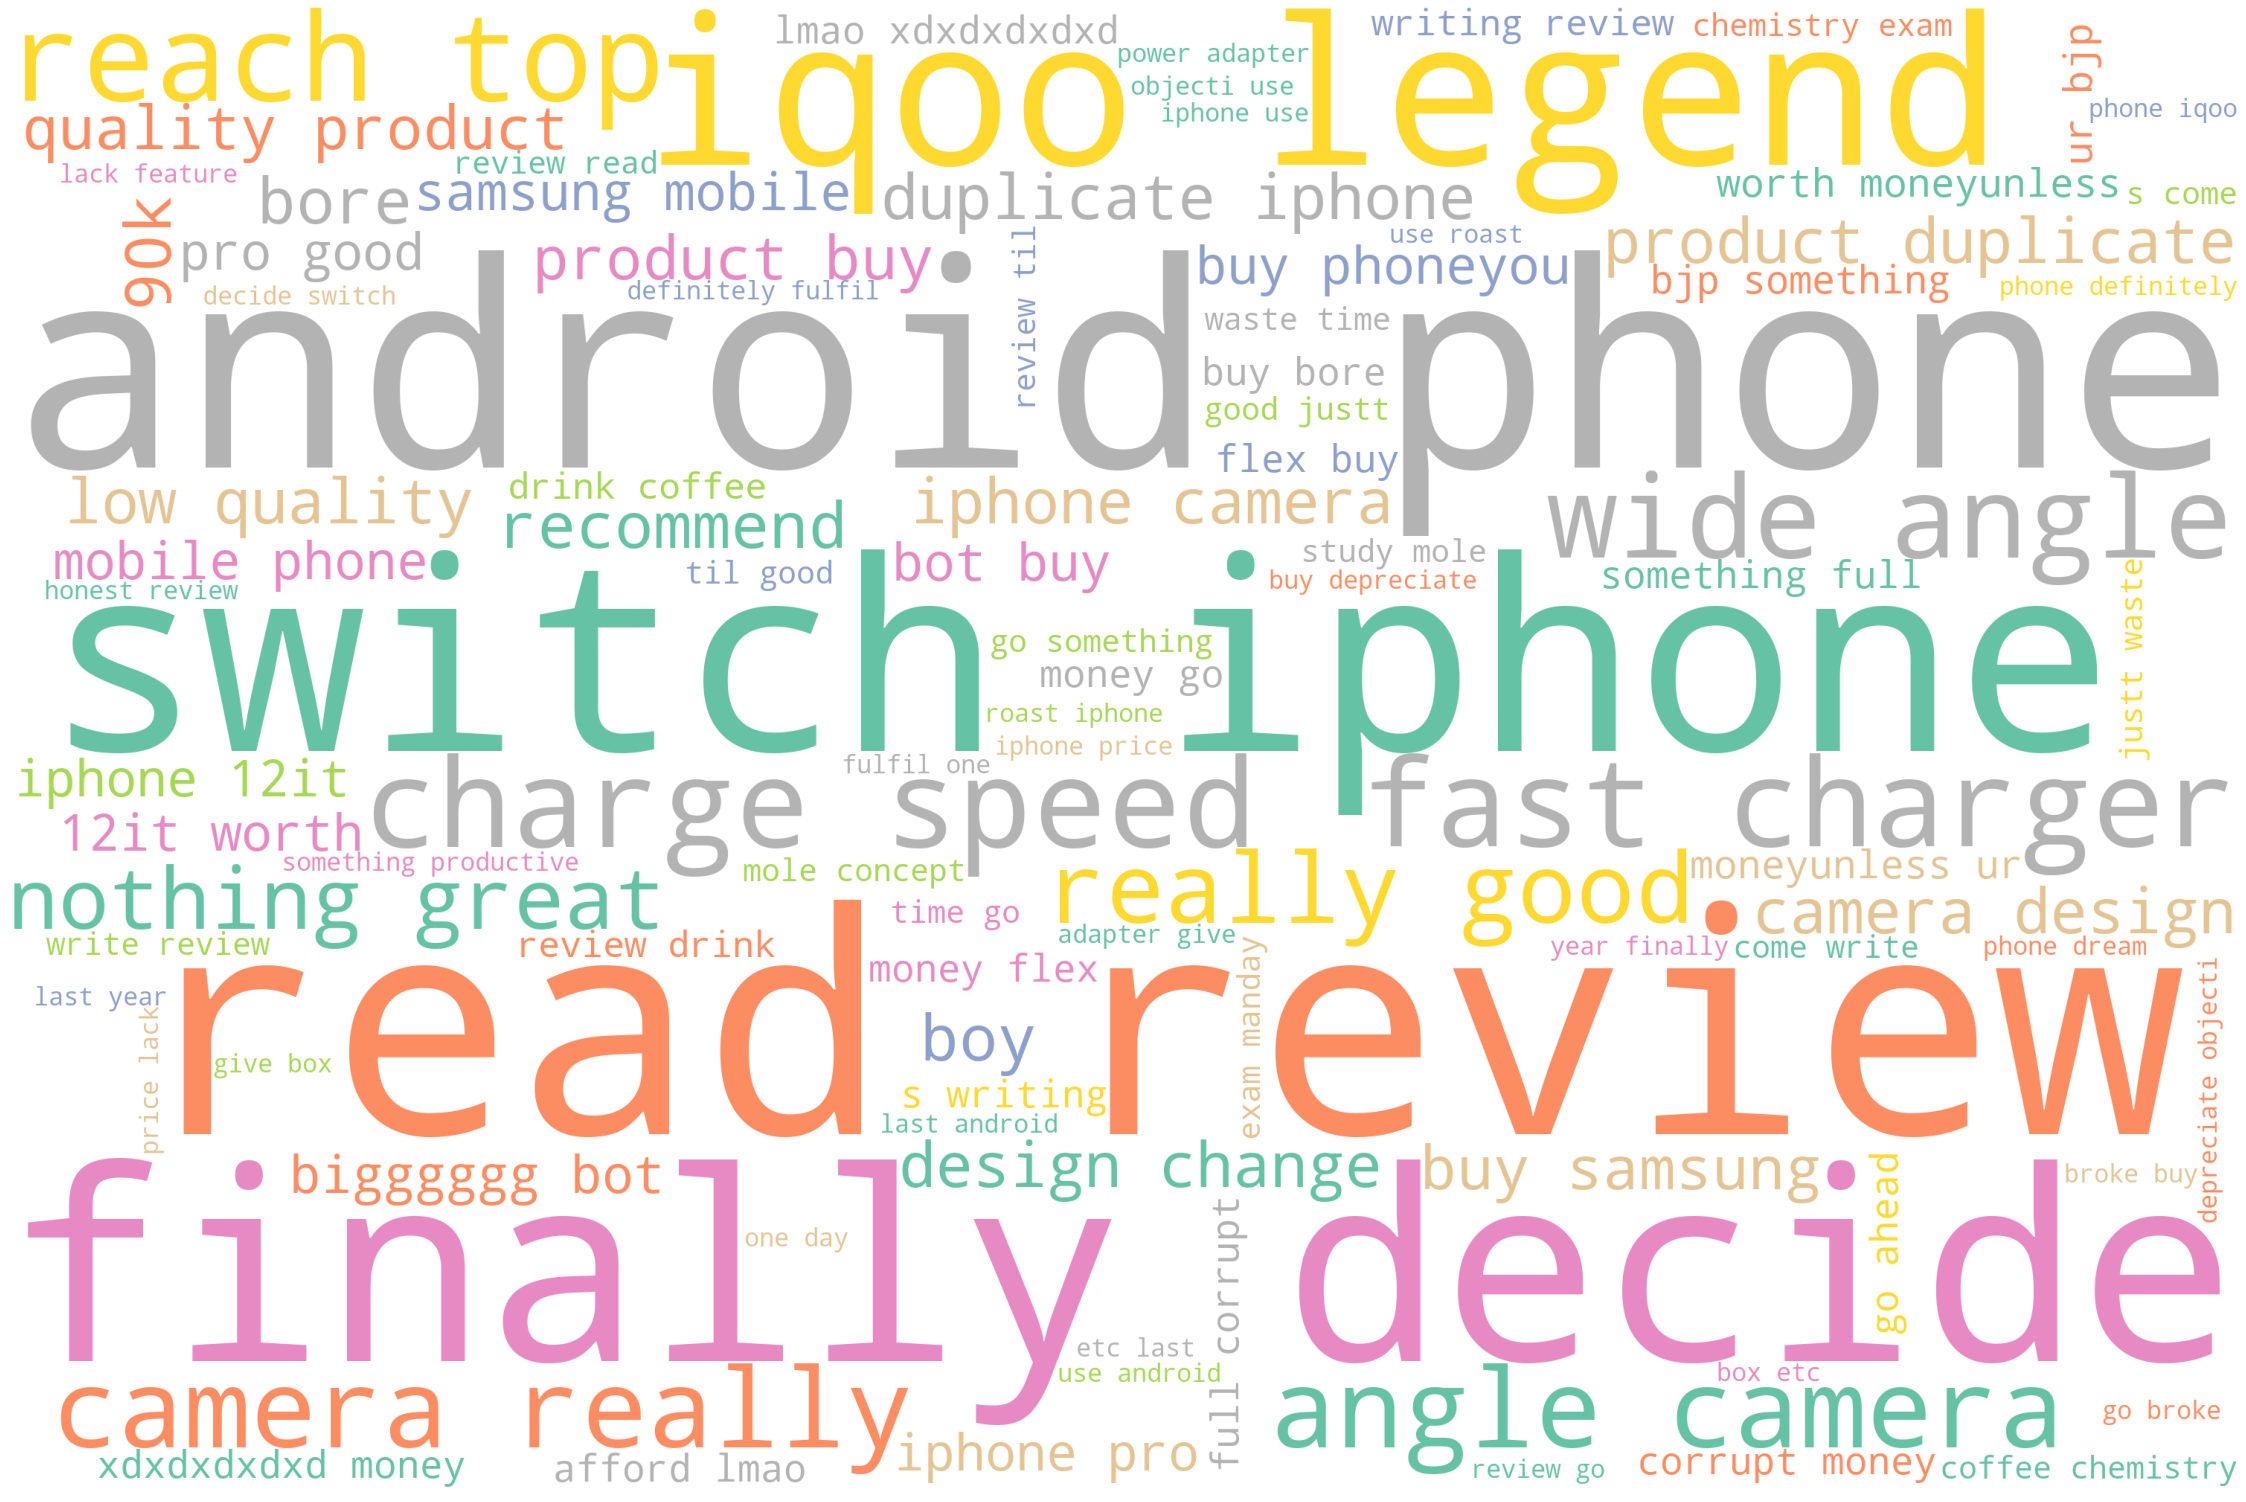

In [26]:
STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

In [27]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [28]:
for token in doc_block[100:200]:
    print(token,token.pos_)

money NOUN
go VERB
ahead ADV
poor ADJ
can AUX
not PART
afford VERB
lmao PROPN
xdxdxdxdxd PROPN
money PROPN
flex ADJ
buy NOUN
bore NOUN
that PRON
s VERB
writing NOUN
review NOUN
drink VERB
coffee NOUN
chemistry NOUN
exam NOUN
manday NOUN
can AUX
not PART
study VERB
mole NOUN
concept NOUN
get VERB
bore NOUN
that PRON
s AUX
come VERB
write VERB
review NOUN
read VERB
review NOUN
til SCONJ
good ADJ
justt NOUN
waste NOUN
time NOUN
go VERB
something PRON
productive ADJ
money NOUN
get VERB
phone NOUN
dream NOUN
get VERB
phone NOUN
definitely ADV
fulfil VERB
one NUM
day NOUN
my PRON
honest ADJ
review NOUN
go VERB
broke ADJ
buy VERB
depreciate ADJ
objecti ADJ
use NOUN
android ADJ
phone NOUN
since SCONJ
last ADJ
10 NUM
year NOUN
finally ADV
decide VERB
switch VERB
iphone NOUN
use NOUN
roast NOUN
iphone NOUN
price NOUN
lack NOUN
feature NOUN
also ADV
thing NOUN
like ADP
power NOUN
adapter NOUN
give VERB
box NOUN
etc X
last ADJ
android ADJ
phone NOUN
iqoo NOUN
7 NUM
legend NOUN
lot NOUN
software NO

In [29]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['buy', 'use', 'phone', 'year', 'decide', 'switch', 'iphone', 'use', 'roast', 'iphone', 'price', 'lack', 'feature', 'thing', 'power', 'adapter', 'give', 'box', 'phone', 'iqoo', 'legend', 'lot', 'software', 'relate', 'issue', 'battery', 'issue', 'update', 'bug', 'decide', 'buy', 'iphone', 'switch', 'android', 'io', 'boy', 'righti', 'hold', 'iphone', 'life', 'price', 'make', 'choice', 'spend', 'saving', 'itiphone', 'smooth', 'legend', '120hz', 'feel', 'iphone', '60hz', 'believe', 'see', 'androidi', 'charge', 'speed', 'iphone', '66w', 'charger', 'iphone', 'buy', 'charger', 'charge', 'speed', 'disappointingdisplay', 'quality', 'flagship', 'level', 'fan', 'display', 'believe', 'reach', 'display', 'hand', 'build', 'quality', 'greati', 'recommend', 'waste', '40k', 'buy', 'pro', 'think', 'camera', 'telephoto', 'lens', 'see', 'image', 'attach', 'quality', 'angle', 'camera', 'pic', 'shoot', 'iphone', 'angle', 'camera', 'struggle', 'camera']


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

word  count
0   iphone   1650
1    phone   1416
2      buy   1298
3   camera    826
4      get    590
5       go    590
6   review    590
7  quality    472
8  battery    472
9      use    354

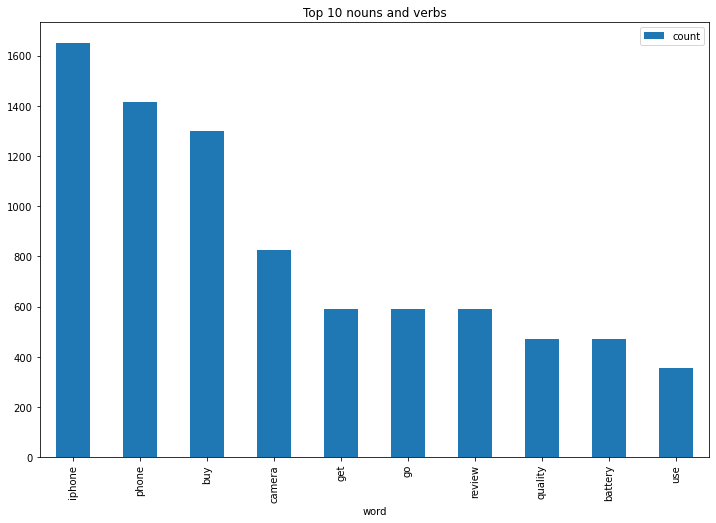

In [31]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [32]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['This product is duplicate of iPhone 12 only camera design changed.',
 'Very low quality of this product Buy Samsung mobile phone You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂 This product is duplicate of iPhone 12 only camera design changed.',
 'Very low quality of this product Buy Samsung mobile phone This product is duplicate of iPhone 12 only camera design changed.',
 'Very low quality of this product Buy Samsung mobile phone This product is duplicate of iPhone 12 only camera design changed.',
 'Very low quality of this product Buy Samsung mobile phone This product is duplicate of iPhone 12 only camera design changed.',
 'Very low quality of this product Buy Samsung mobile phone Just but iphone 12!It’s not worth the money!Unless ur from BJP or something where you’re full with corrupt money, then go ahead.',
 'i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review

In [33]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0     This product is duplicate of iPhone 12 only ca...
1     Very low quality of this product Buy Samsung m...
2     Very low quality of this product Buy Samsung m...
3     Very low quality of this product Buy Samsung m...
4     Very low quality of this product Buy Samsung m...
...                                                 ...
3654  Android is really more user friendly.Battery l...
3655                  Sustains 12hrs’ normal mixed use.
3656                   Price is very low than expected.
3657                         I don't buy cheap phones😜.
3658    Waiting for iPhone 20.......... To buy  A S A P

[3659 rows x 1 columns]

In [40]:
tf = TfidfVectorizer()

In [42]:
text_tf = tf.fit_transform(no_stop_tokens)

In [43]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [44]:
df

10  1010   12  120hz  12hrs  12it   13  1800rs   20  20w  ...  work  \
0      0.0   0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  ...   0.0   
1      0.0   0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  ...   0.0   
2      0.0   0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  ...   0.0   
3      0.0   0.0  1.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  ...   0.0   
4      0.0   0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  ...   0.0   
...    ...   ...  ...    ...    ...   ...  ...     ...  ...  ...  ...   ...   
62889  0.0   0.0  0.0    0.0    0.0   0.0  0.0     0.0  1.0  0.0  ...   0.0   
62890  0.0   0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  ...   0.0   
62891  0.0   0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  ...   0.0   
62892  0.0   0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  ...   0.0   
62893  0.0   0.0  0.0    0.0    0.0   0.0  0.0     0.0  0.0  0.0  ...   0.0   

       world  worth  would  write  writing  xdxdxdxdxd  years  yes  you  
0        0.0    0.0    0.0    0.0      0.0         0.0    0.0  0.0  0.0  
1        0.0    0.0    0.0    0.0      0.0         0.0    0.0  0.0  0.0  
2        0.0    0.0    0.0    0.0      0.0         0.0    0.0  0.0  0.0  
3        0.0    0.0    0.0    0.0      0.0         0.0    0.0  0.0  0.0  
4        0.0    0.0    0.0    0.0      0.0         0.0    0.0  0.0  0.0  
...      ...    ...    ...    ...      ...         ...    ...  ...  ...  
62889    0.0    0.0    0.0    0.0      0.0         0.0    0.0  0.0  0.0  
62890    0.0    0.0    0.0    0.0      0.0         0.0    0.0  0.0  0.0  
62891    0.0    0.0    0.0    0.0      0.0         0.0    0.0  0.0  0.0  
62892    0.0    0.0    0.0    0.0      0.0         0.0    0.0  0.0  0.0  
62893    0.0    0.0    0.0    0.0      0.0         0.0    0.0  0.0  0.0  

[62894 rows x 350 columns]

In [45]:
with open("H:\Data Science Assignments\Data Science Assignments\Text Minning (1).txt","r") as pw:
    positive_words = pw.read().split("\n")

In [46]:
positive_words = positive_words[35:]

In [47]:
with open("H:\Data Science Assignments\Data Science Assignments\Text Minning (2).txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [48]:
negative_words = negative_words[35:]

In [49]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [50]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [52]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [53]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

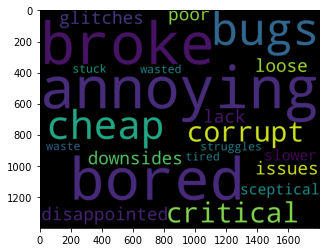

In [54]:
plt.imshow(wordcloud_neg)

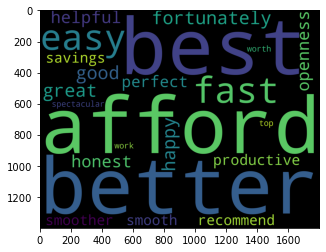

In [55]:
plt.imshow(wordcloud_pos)